## 3. Read images, predict and save to specific folders
Author: Gayathri Nadar, SCF MPI-CBG </br>
Date: 2021-10-04 </br>
For: Rudrarup </br>
Lab: Tang </br> 

### About 
- This notebook is a part of 3 notebooks in sequence:
    * 1_read_images
    * 2_train_save_classifier 
    * 3_do_prediction 
- This notebook **reads images from path specified by user and applies a trained classifier model on it to make a predicition.**
- A new folder called **predicitions** is created outside the folder specified by user. 
- **The image is saved in one of the folder "droplet", "empty" or "aggregates" based on the predictions** inside the "predictions" folder. 

### Preparations
Data:

- **Add all images to be classified into ONE folder**. It could be on the project space!
- **If folder with images is on the project space, mount the server space `tanglab-tds` on your laptop** before running this notebook. 

Python:

- **Keep this jupyter notebook and `functions.py` together!**
- Set up python and jupyter. 
- Required packages: `tifffile`, `numpy`
- Run this notebook. 

### Current workflow 
User Input:

- Folder containing all images to be classified. 
- Folder containing the classifier file. 

Steps:

- Images and image names are read and added to a list.
- Classifier is loaded.
- For every image in list, features are computed and on this the classifier is applied to make a prediction.
- Based on prediction, the image is saved to the respective folder from `droplet`, `empty`, `aggregates`.

### Output 
Found in the folder `predictions`


### Prep: Always run this cell

In [1]:
import numpy as np 
import os
import matplotlib.pyplot as plt
import pickle
import skimage 
from skimage import data, segmentation, feature, future
from functools import partial
from skimage.transform import resize
from pathlib import Path
from functions import * 
import tifffile
import shutil
import csv

### User Input 

1. Enter the path to the folder which contains images you want to classify. ***Note: ALL THE 'TIF' FILES FROM THIS PATH WITHIN FOLDERS AND SUBFOLDERS WILL BE READ AND CLASSIFIED!!***. Make sure to arrange your data properly!
2. Enter the path to the folder which contains classifier file (.pkl file)

In [2]:
# enter values here 
path_images = "../data/Testing/"
path_classifier = "../data/classifierfile/"

# nothing to do from here
shape = (512, 512)

# create 3 folders to save prediction output based on which class they are classified to 
predictions_output = os.path.join(os.path.dirname(path_images), "predictions")
# savedirs = ["empty", "droplet", "aggregates"]
# savepaths = []

# for d in savedirs:
#     savepath = os.path.join(predictions_output, d)
#     savepaths.append(savepath)
    
#     # clean the output from previous run and then make dir
#     if os.path.exists(savepath):
#         try:
#             shutil.rmtree(savepath)
#         except OSError as e:
#             print("Error: %s : %s" % (savepath, e.strerror))
#         os.makedirs(savepath)
#     else:
#         os.makedirs(savepath)

### Prep: Always run this cell

In [3]:
# load classifier
with open(os.path.join(path_classifier, 'classifier_final.pkl'), 'rb') as fid:
    randomforest_classifier = pickle.load(fid)

### Read images from the folder add to list

- read images and also its names 

In [6]:
imagenames = []
imagepaths = []
predictions = []

for root, dirs, files in os.walk(path_images):
    for f in files:
        if f.endswith(".tif"):
            filepath = os.path.join(root, f)
            print("Reading file:", filepath)
            img = tifffile.imread(filepath)
            
            image_reshaped = cv2.resize(img, dsize=shape, interpolation=cv2.INTER_CUBIC)
#             feature_img = getMultiscaleFeature(image_reshaped)
            
            fv_hu_moments = getMomentsFeature(image_reshaped)
            fv_haralick   = getHaralickFeature(image_reshaped)
            fv_histogram  = getHistogramFeature(image_reshaped)
            feature_img = np.hstack([fv_histogram, fv_haralick, fv_hu_moments])
    
            # shape = (1, image shape * feature vec size)
            prediction = randomforest_classifier.predict(feature_img.reshape(1, -1))[0]
            
            print("Predicting image: ", os.path.basename(filepath))
            print("Prediction:" , prediction)
            print("Actual class:", os.path.basename(Path(filepath).parents[1]))
            
#             plt.figure(figsize=(2, 2))
#             plt.imshow(img, interpolation='nearest', cmap='gray')
#             plt.title(f'Prediction: {prediction}')
#             plt.show()
#             print("\n")
            
#             images.append(img)
            imagenames.append(os.path.basename(filepath))
            imagepaths.append(root)
            predictions.append(prediction)
            del img 
            del feature_img
            
print("Done")

Reading file: ../data/Testing/empty/Image1/005RB210727A-PolyAr-NADHbcst_C06.b2_T0001F001L01A01Z02C01.tif
Predicting image:  005RB210727A-PolyAr-NADHbcst_C06.b2_T0001F001L01A01Z02C01.tif
Prediction: empty
Actual class: empty
Reading file: ../data/Testing/empty/Image1/005RB210727A-PolyAr-NADHbcst_C06.b2_T0001F001L01A01Z01C01.tif
Predicting image:  005RB210727A-PolyAr-NADHbcst_C06.b2_T0001F001L01A01Z01C01.tif
Prediction: empty
Actual class: empty
Reading file: ../data/Testing/empty/Image1/005RB210727A-PolyAr-NADHbcst_C06.b2_T0001F001L01A01Z03C01.tif
Predicting image:  005RB210727A-PolyAr-NADHbcst_C06.b2_T0001F001L01A01Z03C01.tif
Prediction: empty
Actual class: empty
Reading file: ../data/Testing/empty/Image5/005RB210727A-PolyAr-NADHbcst_F06.c1_T0001F001L01A01Z02C01.tif
Predicting image:  005RB210727A-PolyAr-NADHbcst_F06.c1_T0001F001L01A01Z02C01.tif
Prediction: aggregates
Actual class: empty
Reading file: ../data/Testing/empty/Image5/005RB210727A-PolyAr-NADHbcst_F06.c1_T0001F001L01A01Z01C0

Predicting image:  001RB201016A-pR-ATP-00h_G06.d2_T0001F001L01A02Z06C01.tif
Prediction: aggregates
Actual class: droplet
Reading file: ../data/Testing/droplet/Image4/001RB201016A-pR-ATP-00h_G06.d2_T0001F001L01A02Z02C01.tif
Predicting image:  001RB201016A-pR-ATP-00h_G06.d2_T0001F001L01A02Z02C01.tif
Prediction: aggregates
Actual class: droplet
Reading file: ../data/Testing/droplet/Image4/001RB201016A-pR-ATP-00h_G06.d2_T0001F001L01A02Z05C01.tif
Predicting image:  001RB201016A-pR-ATP-00h_G06.d2_T0001F001L01A02Z05C01.tif
Prediction: aggregates
Actual class: droplet
Reading file: ../data/Testing/droplet/Image4/001RB201016A-pR-ATP-00h_G06.d2_T0001F001L01A02Z03C01.tif
Predicting image:  001RB201016A-pR-ATP-00h_G06.d2_T0001F001L01A02Z03C01.tif
Prediction: aggregates
Actual class: droplet
Reading file: ../data/Testing/droplet/Image4/001RB201016A-pR-ATP-00h_G06.d2_T0001F001L01A02Z01C01.tif
Predicting image:  001RB201016A-pR-ATP-00h_G06.d2_T0001F001L01A02Z01C01.tif
Prediction: aggregates
Actual cl

In [15]:
out_f = open(join(predictions_output, "test.csv"), 'w')
w = csv.writer(out_f, delimiter='\t')  # set tab as delimiter
w.writerow(["Path", "Image name", "Predicted class"])

for p, n, out in zip(imagepaths, imagenames, predictions): 
    row_val = [p, n, out]
    w.writerow(row_val)

out_f.close()

### Apply loaded model, predict and save output to specific folder 

Starting predictions on ALL images in folder:  ../data/Testing/
This might take time...

Predicting image:  005RB210727A-PolyAr-NADHbcst_C06.b2_T0001F001L01A01Z02C01.tif
Predicition: empty


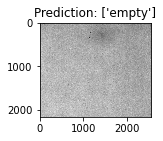



Predicting image:  005RB210727A-PolyAr-NADHbcst_C06.b2_T0001F001L01A01Z03C01.tif
Predicition: empty


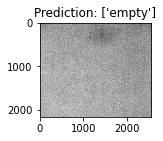



Predicting image:  005RB210727A-PolyAr-NADHbcst_C06.b2_T0001F001L01A01Z01C01.tif
Predicition: empty


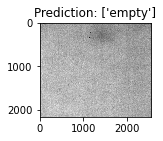



Predicting image:  005RB210727A-PolyAr-NADHbcst_C07.b3_T0001F001L01A01Z01C01.tif
Predicition: empty


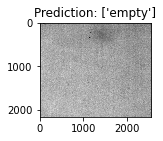



Predicting image:  005RB210727A-PolyAr-NADHbcst_C07.b3_T0001F001L01A01Z02C01.tif
Predicition: empty


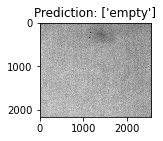



Predicting image:  005RB210727A-PolyAr-NADHbcst_C07.b3_T0001F001L01A01Z03C01.tif
Predicition: empty


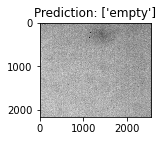



Predicting image:  005RB210727A-PolyAr-NADHbcst_C06.b4_T0001F001L01A01Z03C01.tif
Predicition: empty


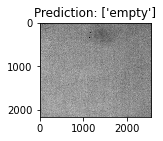



Predicting image:  005RB210727A-PolyAr-NADHbcst_C06.b4_T0001F001L01A01Z02C01.tif
Predicition: empty


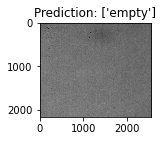



Predicting image:  005RB210727A-PolyAr-NADHbcst_C06.b4_T0001F001L01A01Z01C01.tif
Predicition: empty


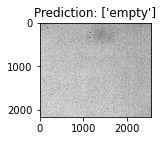



Predicting image:  001RB201016A-pR-ATP-00h_G06.d2_T0001F001L01A02Z01C01.tif
Predicition: aggregates


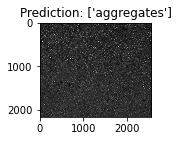



Predicting image:  001RB201016A-pR-ATP-00h_G06.d2_T0001F001L01A02Z02C01.tif
Predicition: aggregates


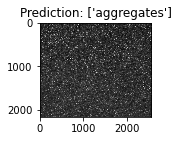



Predicting image:  001RB201016A-pR-ATP-00h_G06.d2_T0001F001L01A02Z05C01.tif
Predicition: aggregates


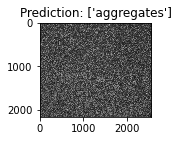



Predicting image:  001RB201016A-pR-ATP-00h_G06.d2_T0001F001L01A02Z04C01.tif
Predicition: aggregates


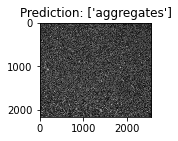



Predicting image:  001RB201016A-pR-ATP-00h_G06.d2_T0001F001L01A02Z03C01.tif
Predicition: aggregates


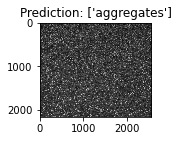



Predicting image:  001RB201016A-pR-ATP-00h_G06.d2_T0001F001L01A02Z06C01.tif
Predicition: aggregates


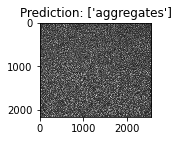



Predicting image:  001RB201016A-pR-ATP-00h_D02.b3_T0001F001L01A02Z05C01.tif
Predicition: aggregates


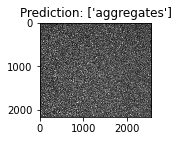



Predicting image:  001RB201016A-pR-ATP-00h_D02.b3_T0001F001L01A02Z03C01.tif
Predicition: aggregates


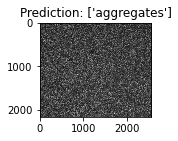



Predicting image:  001RB201016A-pR-ATP-00h_D02.b3_T0001F001L01A02Z01C01.tif
Predicition: aggregates


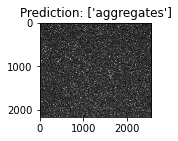



Predicting image:  001RB201016A-pR-ATP-00h_D02.b3_T0001F001L01A02Z06C01.tif
Predicition: aggregates


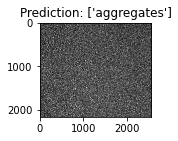



Predicting image:  001RB201016A-pR-ATP-00h_D02.b3_T0001F001L01A02Z04C01.tif
Predicition: aggregates


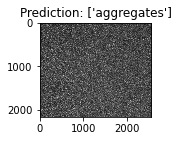



Predicting image:  001RB201016A-pR-ATP-00h_D02.b3_T0001F001L01A02Z02C01.tif
Predicition: aggregates


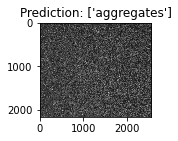



Predicting image:  005RB210727A-PolyAr-NADHbcst_E02.a3_T0001F001L01A01Z01C01.tif
Predicition: droplet


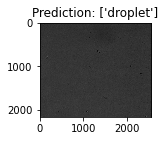



Predicting image:  005RB210727A-PolyAr-NADHbcst_E02.a3_T0001F001L01A01Z02C01.tif
Predicition: droplet


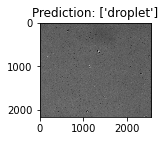



Predicting image:  005RB210727A-PolyAr-NADHbcst_E02.a3_T0001F001L01A01Z03C01.tif
Predicition: droplet


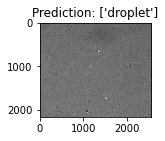



Predicting image:  001RB201016A-pR-ATP-00h_D03.d2_T0001F001L01A02Z02C01.tif
Predicition: aggregates


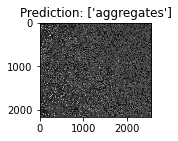



Predicting image:  001RB201016A-pR-ATP-00h_D03.d2_T0001F001L01A02Z01C01.tif
Predicition: aggregates


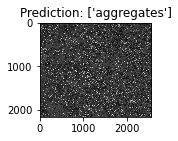



Predicting image:  001RB201016A-pR-ATP-00h_D03.d2_T0001F001L01A02Z06C01.tif
Predicition: aggregates


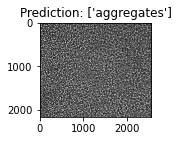



Predicting image:  001RB201016A-pR-ATP-00h_D03.d2_T0001F001L01A02Z03C01.tif
Predicition: aggregates


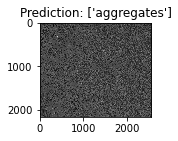



Predicting image:  001RB201016A-pR-ATP-00h_D03.d2_T0001F001L01A02Z04C01.tif
Predicition: aggregates


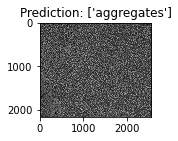



Predicting image:  001RB201016A-pR-ATP-00h_D03.d2_T0001F001L01A02Z05C01.tif
Predicition: aggregates


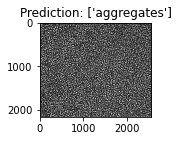



Predicting image:  005RB210727A-PolyAr-NADHbcst_E05.c3_T0001F001L01A01Z02C01.tif
Predicition: aggregates


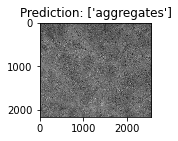



Predicting image:  005RB210727A-PolyAr-NADHbcst_E05.c3_T0001F001L01A01Z01C01.tif
Predicition: droplet


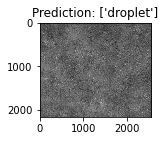



Predicting image:  005RB210727A-PolyAr-NADHbcst_E05.c3_T0001F001L01A01Z03C01.tif
Predicition: aggregates


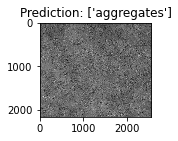



Predicting image:  005RB210727A-PolyAr-NADHbcst_D05.d4_T0001F001L01A01Z03C01.tif
Predicition: aggregates


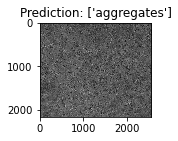



Predicting image:  005RB210727A-PolyAr-NADHbcst_D05.d4_T0001F001L01A01Z02C01.tif
Predicition: aggregates


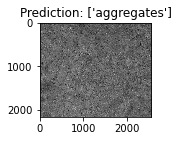



Predicting image:  005RB210727A-PolyAr-NADHbcst_D05.d4_T0001F001L01A01Z01C01.tif
Predicition: aggregates


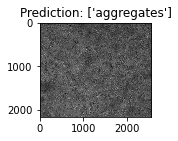



Predicting image:  005RB210727A-PolyAr-NADHbcst_E05.d3_T0001F001L01A01Z02C01.tif
Predicition: aggregates


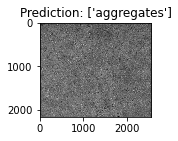



Predicting image:  005RB210727A-PolyAr-NADHbcst_E05.d3_T0001F001L01A01Z01C01.tif
Predicition: droplet


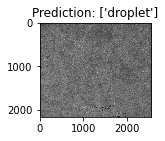



Predicting image:  005RB210727A-PolyAr-NADHbcst_E05.d3_T0001F001L01A01Z03C01.tif
Predicition: aggregates


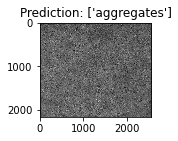



Predicting image:  005RB210727A-PolyAr-NADHbcst_C05.c3_T0001F001L01A01Z01C01.tif
Predicition: aggregates


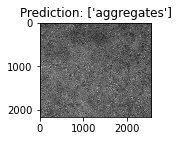



Predicting image:  005RB210727A-PolyAr-NADHbcst_C05.c3_T0001F001L01A01Z03C01.tif
Predicition: aggregates


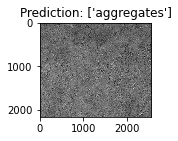



Predicting image:  005RB210727A-PolyAr-NADHbcst_C05.c3_T0001F001L01A01Z02C01.tif
Predicition: aggregates


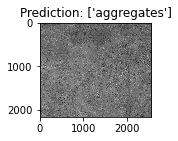



Predicting image:  005RB210727A-PolyAr-NADHbcst_D05.d3_T0001F001L01A01Z02C01.tif
Predicition: aggregates


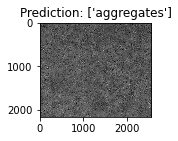



Predicting image:  005RB210727A-PolyAr-NADHbcst_D05.d3_T0001F001L01A01Z03C01.tif
Predicition: aggregates


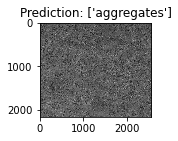



Predicting image:  005RB210727A-PolyAr-NADHbcst_D05.d3_T0001F001L01A01Z01C01.tif
Predicition: aggregates


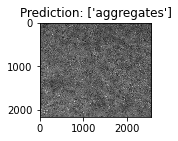



DONE


In [16]:
print("Starting predictions on ALL images in folder: ", path_images)
print("This might take time...\n")

for img, name in zip(images, imagenames):
    
    # reshape image before computing features 
    image_reshaped = cv2.resize(img, dsize=shape, interpolation=cv2.INTER_CUBIC)
    
    print("Predicting image: ", name)
#     feature_img = getMultiscaleFeature(image_reshaped)
    
    fv_hu_moments = getMomentsFeature(image_reshaped)
    fv_haralick   = getHaralickFeature(image_reshaped)
    fv_histogram  = getHistogramFeature(image_reshaped)
    feature_img = np.hstack([fv_histogram, fv_haralick, fv_hu_moments])
    
    # shape = (1, image shape * feature vec size)
    prediction = randomforest_classifier.predict(feature_img.reshape(1, -1)) 
    print("Predicition:" , prediction[0])
    
    if prediction == "empty":
        tifffile.imsave(os.path.join(savepaths[0], name), img)
        
    if prediction == "droplet":
        tifffile.imsave(os.path.join(savepaths[1], name), img)
        
    if prediction == "aggregates":
        tifffile.imsave(os.path.join(savepaths[2], name), img)
    
    plt.figure(figsize=(2, 2))
    plt.imshow(img, interpolation='nearest', cmap='gray')
    plt.title(f'Prediction: {prediction}')
    
    plt.show()
    
    print("\n")
    
print("DONE")

In [21]:
import datetime
datetime.datetime.now().strftime("%Y%m%d_%H%M")

'20211022_1215'